<a href="https://colab.research.google.com/github/iangama/Desafio-7/blob/main/Desafio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste projeto, iremos aplicar os conhecimentos de classificação para mapear qual o perfil de usuários tem mais chance de deixar uma plataforma de streaming.

# Contexto

Uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. A empresa deseja prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não.

# Sobre os dados

Os dados fornecidos possuem informações sobre as contas dos clientes na plataforma de streaming, divididos entre contas Basic, Standard e Premium, onde cada uma oferece uma gama maior de serviços que a anterior.

- *client_id*: Código de identificação do cliente Int
- *age*: Idade do cliente Int
- *gender*: Gênero do cliente String
- *region*: Região de origem do cliente String
- *subscription_days*: Dias de assinatura ativa do cliente Int
- *subscription_type*: Tipo de conta String
- *num_contents*: Quantidade de conteúdos assistidos Int
- *avg_rating*: Avaliação média dos conteúdos da plataforma Int
- *num_active_profiles*: Número de perfis ativos na plataforma Int
- *num_streaming_services*: Quantidade de serviços de streaming que o cliente possui Int
- *devices_connected*: Quantidade de dispositivos conectados à conta Int
- *churned*: Se o cliente cancelou a conta ou não Int

# Etapa 01) Análise exploratória dos dados (Data Understanding)

In [ ]:
# importa o drive
from google.colab import drive

# monta o google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# pasta onde os dados foram salvos no Google Drive
caminho_drive = '/content/drive/MyDrive/'
caminho_dados = 'Projetos/Análises/Ian G 2023/'
nome_arquivo = 'streaming_data.csv'
caminho = caminho_drive + caminho_dados + nome_arquivo

# lê o dataset
df = pd.read_csv(caminho, sep=',', encoding='latin')

In [ ]:
# exibe primeiras 5 linhas do dataset
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# exibe informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# exibe estatísticas descritivas do dataset
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# conta valores nulos em cada coluna
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

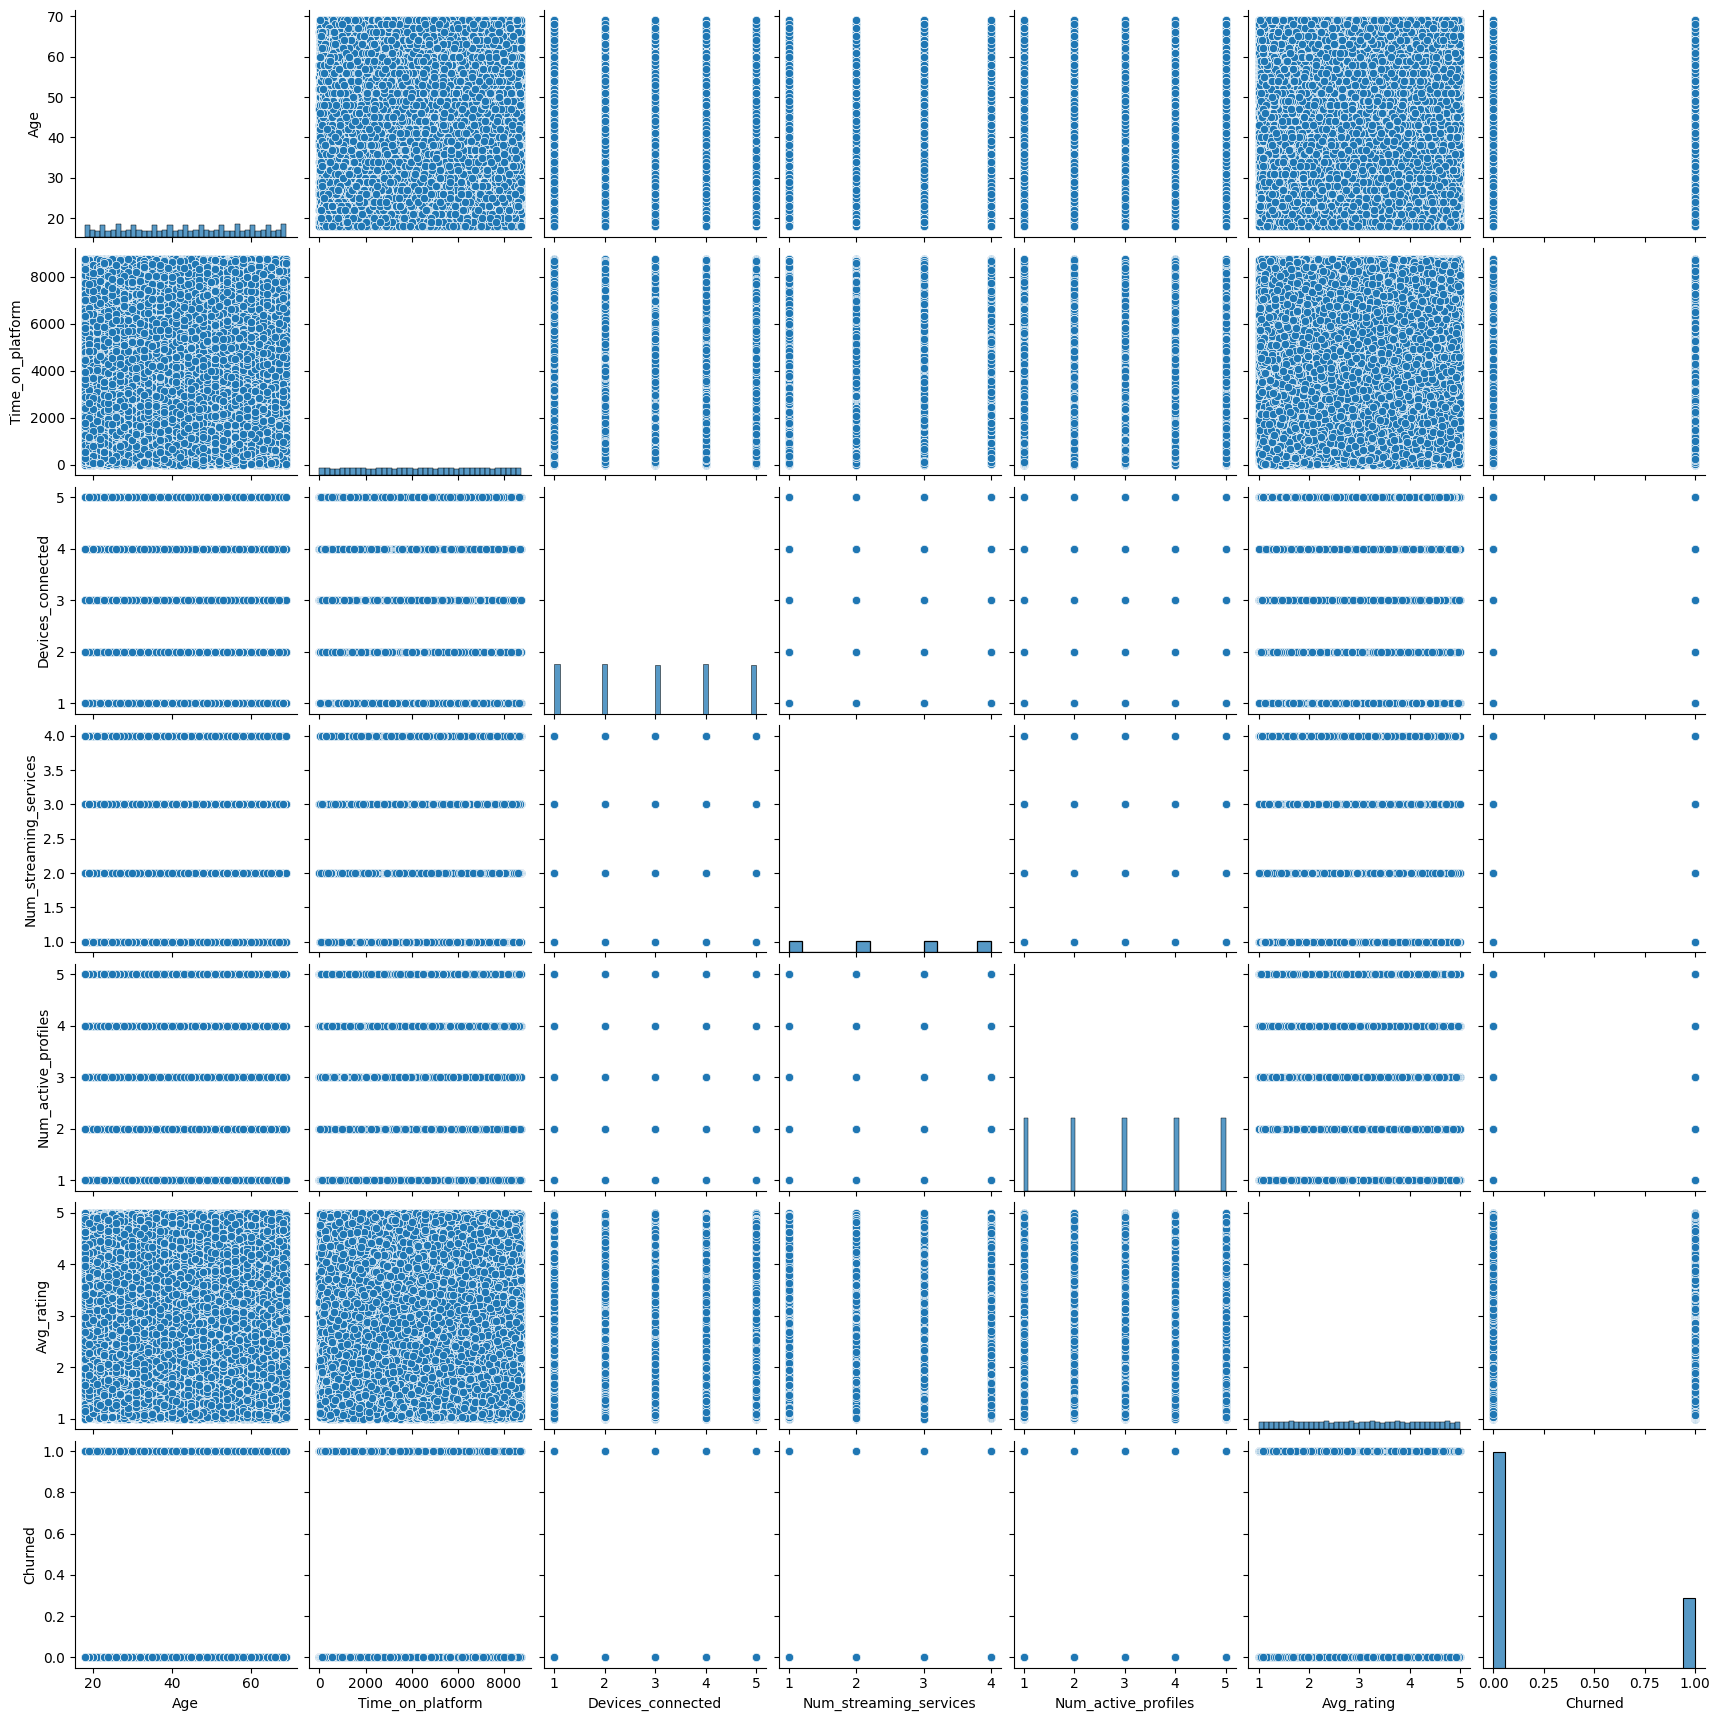

In [ ]:
# plota
sns.pairplot(df)
plt.show()

# Etapa 02) Tratamento dos Dados (Data Preparation)

In [ ]:
# substitui valores “NaN” por 0
# colunas: Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
df[['Time_on_platform',
    'Num_streaming_services',
    'Churned',
    'Avg_rating',
    'Devices_connected']] = df[['Time_on_platform',
                                'Num_streaming_services',
                                'Churned',
                                'Avg_rating',
                                'Devices_connected']].fillna(0)

In [ ]:
# dropa linhas nulas
# colunas: Gender, Subscription_type, Age
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [ ]:
# transforma valores churned 0 e 1 por No e Yes
df.replace({'Churned': {0: 'No', 1: 'Yes'}}, inplace=True)

In [ ]:
# transforma valores floats em valores inteiros
df[['Age',
    'Time_on_platform',
    'Devices_connected',
    'Num_streaming_services',
    'Avg_rating']] = df[['Age',
                         'Time_on_platform',
                         'Devices_connected',
                         'Num_streaming_services',
                         'Avg_rating']].astype(int)

# Etapa 03) Modelagem dos Dados - Regressão Logística

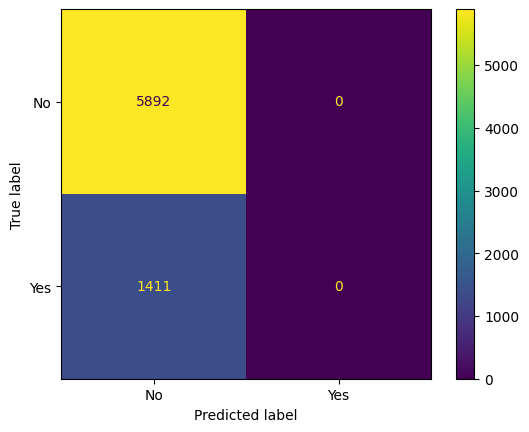

In [ ]:
# define variáveis X e y
y = df['Churned']
X = df[['Age','Gender','Time_on_platform','Devices_connected','Subscription_type',
        'Num_streaming_services','Num_active_profiles','Avg_rating']]

# divide em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# usa label encoder na variável de gênero
encoder = LabelEncoder()
X_train['Gender'] = encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = encoder.transform(X_test['Gender'])

# cria dummy para tipo de inscrição
X_train = pd.get_dummies(data=X_train, columns=['Subscription_type'], drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=['Subscription_type'], drop_first=True)

# normaliza as variávels com Min-Max scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# realiza modelagem
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# faz previsão
y_pred = lr.predict(X_test)

# plota matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)
plt.show()

# Etapa 04) Modelagem dos Dados - Random Forest

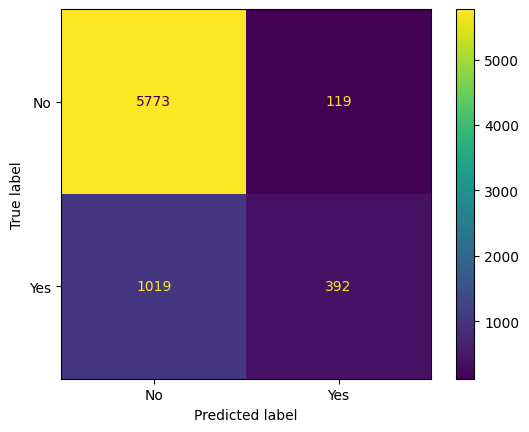

In [ ]:
# define variáveis X e y
y = df['Churned']
X = df[['Age','Gender','Time_on_platform','Devices_connected','Subscription_type',
        'Num_streaming_services','Num_active_profiles','Avg_rating']]

# divide em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# usa label encoder na variável de gênero
encoder = LabelEncoder()
X_train['Gender'] = encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = encoder.transform(X_test['Gender'])

# cria dummy para tipo de inscrição
X_train = pd.get_dummies(data=X_train, columns=['Subscription_type'], drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=['Subscription_type'], drop_first=True)

# normaliza as variávels com Min-Max scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# realiza modelagem
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# faz previsão
y_pred = rf.predict(X_test)

# plota matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)
plt.show()

# Etapa 05) Modelagem dos Dados - Tunning

In [ ]:
# define o grid para busca
grid_space = {
    'n_estimators': [100, 500, 1000]
  }

# cria modelo
rf_2 = RandomForestClassifier(random_state=42, class_weight='balanced')

# realiza o grid search
grid = GridSearchCV(rf_2, param_grid=grid_space, cv=3, scoring='accuracy')
cv_grid = grid.fit(X_train, y_train)

# printa os melhores parâmetros
cv_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

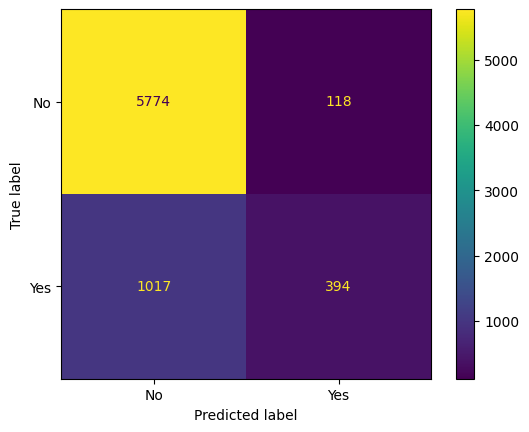

In [ ]:
# atribui os melhores parâmetros ao modelo
rf_2.set_params(**cv_grid.best_estimator_.get_params())

# realiza modelagem
rf_2.fit(X_train, y_train)

# faz previsão
y_pred = rf_2.predict(X_test)

# plota matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)
plt.show()